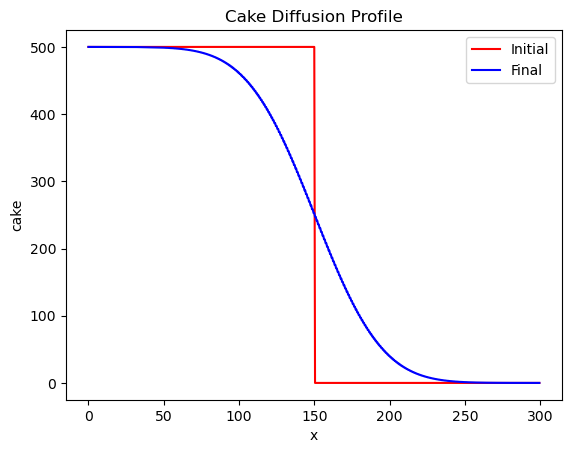

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_stable_time_step(dx, diffusivity):
    """Calculate a stable time step for the model."""
    return 0.5 * dx ** 2 / diffusivity

def plot_profile(x, cake, color="r", label=None):
    """Display the cake profile."""
    plt.plot(x, cake, color=color, label=label)
    plt.xlabel("x")
    plt.ylabel("cake")
    plt.title("Cake Diffusion Profile")
    if label:
        plt.legend()

# Parameters
D = 100         # Diffusivity
Lx = 300        # Length of domain
dx = 0.5        # Spatial step
x = np.arange(0, Lx, dx)
nx = len(x)

# Initial Conditions
C = np.zeros_like(x)
C_left = 500
C_right = 0
C[x <= Lx / 2] = C_left
C[x > Lx / 2] = C_right

# Plot initial condition
plt.figure()
plot_profile(x, C, color="red", label="Initial")

# Time-stepping parameters
nt = 5000
dt = calculate_stable_time_step(dx, D)

# Time stepping loop
for t in range(nt):
    C[1:-1] += D * dt / dx ** 2 * (C[:-2] - 2 * C[1:-1] + C[2:])
    # Optional: enforce fixed boundaries (not necessary here since edges are untouched)
    C[0] = C_left
    C[-1] = C_right

# Plot final result
plot_profile(x, C, color="blue", label="Final")
plt.show()
